# Supervised ML Classifiers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('9_5day_resampled.csv')#using 100% labelled resampled data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
Xtrain,Xval,ytrain,yval=train_test_split(X,y,random_state=0,test_size=0.2)

### Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
train0=time.time()
clf=RandomForestClassifier().fit(Xtrain,ytrain)
train1=time.time()
print('train-time: '+str(train1-train0))

train-time: 129.3002212047577


In [16]:
print("Train accuracy : "+str(clf.score(Xtrain,ytrain))) #train accuracy
test0=time.time()
print("Test accuracy : "+str(clf.score(Xval,yval)))# test accuracy
test1=time.time()
print('test-time: '+str(test1-test0))

Train accuracy : 1.0
Test accuracy : 0.930497271401041
test-time: 4.159324645996094


In [17]:
y_pred=clf.predict(Xval)
print('weighted F1 Score : ' + str(f1_score(y_pred,yval,average = 'weighted')))
print('weighted Precision : ' + str(precision_score(y_pred,yval,average = 'weighted',zero_division=1)))
print('weighted Recall : ' + str(recall_score(y_pred,yval,average = 'weighted',zero_division=1)))

weighted F1 Score : 0.9313933860967433
weighted Precision : 0.932957993281478
weighted Recall : 0.930497271401041


In [4]:
y_pred=clf.predict(Xval)
print('macro F1 Score : ' + str(f1_score(y_pred,yval,average = 'macro')))
print('macro Precision : ' + str(precision_score(y_pred,yval,average = 'macro',zero_division=1)))
print('macro Recall : ' + str(recall_score(y_pred,yval,average = 'macro',zero_division=1)))

macro F1 Score : 0.9367384977920438
macro Precision : 0.937905243070162
macro Recall : 0.936267773176522


### Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
train0=time.time()
clf=DecisionTreeClassifier().fit(Xtrain,ytrain)
train1=time.time()
print('train-time: '+str(train1-train0))

train-time: 15.537061929702759


In [28]:
print("Train accuracy : "+str(clf.score(Xtrain,ytrain))) #train accuracy
test0=time.time()
print("Test accuracy : "+str(clf.score(Xval,yval)))# test accuracy
test1=time.time()
print('test-time: '+str(test1-test0))

Train accuracy : 1.0
Test accuracy : 0.9259045800839292
test-time: 0.1283702850341797


In [29]:
y_pred=clf.predict(Xval)
print('weighted F1 Score : ' + str(f1_score(y_pred,yval,average = 'weighted')))
print('weighted Precision : ' + str(precision_score(y_pred,yval,average = 'weighted',zero_division=1)))
print('weighted Recall : ' + str(recall_score(y_pred,yval,average = 'weighted',zero_division=1)))

weighted F1 Score : 0.9274069882261075
weighted Precision : 0.9293403350378222
weighted Recall : 0.9259045800839292


In [6]:
y_pred=clf.predict(Xval)
print('macro F1 Score : ' + str(f1_score(y_pred,yval,average = 'macro')))
print('macro Precision : ' + str(precision_score(y_pred,yval,average = 'macro',zero_division=1)))
print('macro Recall : ' + str(recall_score(y_pred,yval,average = 'macro',zero_division=1)))

macro F1 Score : 0.9316280401102761
macro Precision : 0.9336626450069077
macro Recall : 0.9300102107586247


### XGBOOST

In [7]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [10]:
train0=time.time()
clf = OneVsRestClassifier(XGBClassifier(verbosity=0)).fit(Xtrain, ytrain)
train1=time.time()
print('train-time: '+str(train1-train0))

c:\users\dhruvjyoti\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train-time: 1540.0211742801666


In [50]:
clf.score(Xtrain,ytrain)

0.9764061740179746

In [51]:
clf.score(Xval,yval)

0.9488500261153036

In [32]:
test0=time.time()
z= clf.score(Xval,yval)
test1=time.time()
print('test-time: '+str(test1-test0))

test-time: 7.68883752822876


In [52]:
y_pred=clf.predict(Xval)
print('weighted F1 Score : ' + str(f1_score(y_pred,yval,average = 'weighted')))
print('weighted Precision : ' + str(precision_score(y_pred,yval,average = 'weighted',zero_division=1)))
print('weighted Recall : ' + str(recall_score(y_pred,yval,average = 'weighted',zero_division=1)))

weighted F1 Score : 0.9494270153872865
weighted Precision : 0.9504061564948149
weighted Recall : 0.9488500261153036


In [18]:
#y_pred=clf.predict(Xval)
print('macro F1 Score : ' + str(f1_score(y_pred,yval,average = 'macro')))
print('macro Precision : ' + str(precision_score(y_pred,yval,average = 'macro',zero_division=1)))
print('macro Recall : ' + str(recall_score(y_pred,yval,average = 'macro',zero_division=1)))

macro F1 Score : 0.9439822506449667
macro Precision : 0.9542895296353789
macro Recall : 0.9412516852062398


In [38]:
y_pred=clf.predict(Xval)

In [27]:
print('F1 Scores : ' )
pd.DataFrame(f1_score(y_pred,yval,labels=yval.unique(),average = None),columns=['F1-score'],index=yval.unique())

F1 Scores : 


,F1-score
MICROSOFT,0.820356
EDONKEY,1.000000
TWITTER,0.947732
GMAIL,0.745151
AMAZON,0.955803
MQTT,0.998578
STARCRAFT,1.000000
SSL_NO_CERT,0.995401
HTTP_PROXY,0.679795
H323,1.000000


In [28]:
print('Precision Scores : ' )
pd.DataFrame(precision_score(y_pred,yval,labels=yval.unique(),average = None),columns=['Precision-score'],index=yval.unique())

Precision Scores : 


,Precision-score
MICROSOFT,0.784810
EDONKEY,1.000000
TWITTER,0.951485
GMAIL,0.749546
AMAZON,0.942182
MQTT,1.000000
STARCRAFT,1.000000
SSL_NO_CERT,1.000000
HTTP_PROXY,0.667227
H323,1.000000


In [29]:
print('Recall Scores : ' )
pd.DataFrame(recall_score(y_pred,yval,labels=yval.unique(),average = None),columns=['recall-score'],index=yval.unique())

Recall Scores : 


,recall-score
MICROSOFT,0.859275
EDONKEY,1.000000
TWITTER,0.944008
GMAIL,0.740807
AMAZON,0.969824
MQTT,0.997159
STARCRAFT,1.000000
SSL_NO_CERT,0.990844
HTTP_PROXY,0.692845
H323,1.000000


#### Confusion Matrix with 10 chosen well-known classes
Classes : AMAZON, FACEBOOK, GMAIL, GOOGLE, HTTP, OFFICE_365, SKYPE, TWITTER, WHATSAPP, YOUTUBE

In [40]:
from sklearn.metrics import confusion_matrix
apps=['AMAZON','FACEBOOK','GMAIL','GOOGLE','HTTP','OFFICE_365','SKYPE','TWITTER','WHATSAPP','YOUTUBE']#reporting for these well-known Apps
yval[yval.isin(apps)]
cm=confusion_matrix(yval[yval.isin(apps)],y_pred[yval.isin(apps)],labels=yval[yval.isin(apps)].unique())

In [42]:
cm_pc=pd.DataFrame((cm.T/np.sum(cm,axis=1)).T,columns=yval[yval.isin(apps)].unique(),index=yval[yval.isin(apps)].unique())
cm_pc=cm_pc.replace(np.nan,0)

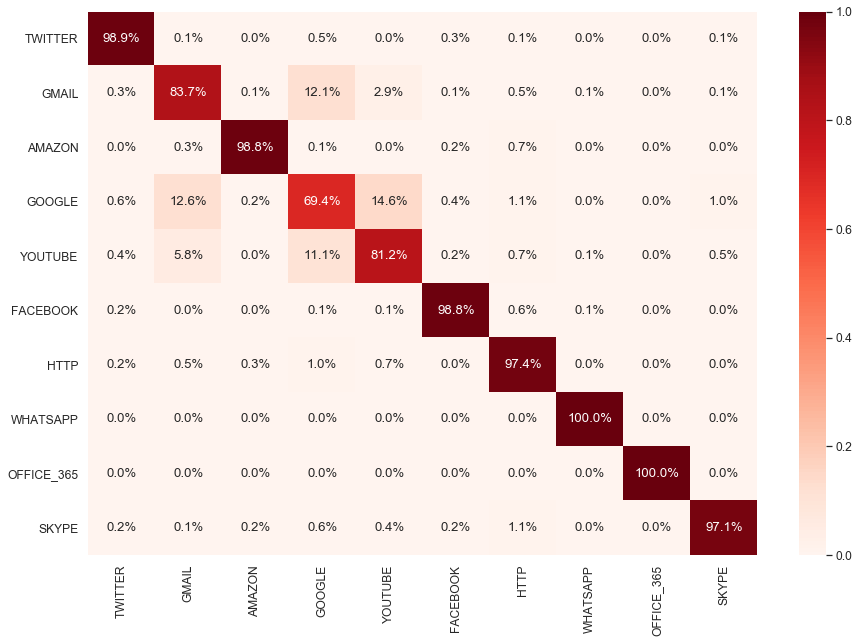

In [59]:
import seaborn as sns
plt.figure(figsize=(15,10))
df_cm=pd.DataFrame(cm,columns=yval[yval.isin(apps)].unique(),index=yval[yval.isin(apps)].unique())
sns.set(font_scale=1.1)
sns.heatmap(cm_pc, annot=True,fmt='.1%',cmap=sns.color_palette("Reds",150)) # font size
plt.show()

### SVM

In [19]:
from sklearn.svm import SVC
train0=time.time()
clf=SVC(random_state=0,kernel='rbf').fit(Xtrain,ytrain)
train1=time.time()
print('train-time: '+str(train1-train0))

train-time: 7440.93563246727


In [4]:
print("Train accuracy : "+str(clf.score(Xtrain,ytrain))) #train accuracy
test0=time.time()
print("Test accuracy : "+str(clf.score(Xval,yval)))# test accuracy
test1=time.time()
print('test-time: '+str(test1-test0))

Train accuracy : 0.32472128667399097
Test accuracy : 0.3238837959044
test-time: 2132.2163865566254


In [5]:
y_pred=clf.predict(Xval)
print('weighted F1 Score : ' + str(f1_score(y_pred,yval,average = 'weighted')))
print('weighted Precision : ' + str(precision_score(y_pred,yval,average = 'weighted',zero_division=1)))
print('weighted Recall : ' + str(recall_score(y_pred,yval,average = 'weighted',zero_division=1)))

weighted F1 Score : 0.3827319279687075
weighted Precision : 0.7580599337575223
weighted Recall : 0.3238837959044


In [21]:
y_pred=clf.predict(Xval)
print('macro F1 Score : ' + str(f1_score(y_pred,yval,average = 'macro')))
print('macro Precision : ' + str(precision_score(y_pred,yval,average = 'macro',zero_division=1)))
print('macro Recall : ' + str(recall_score(y_pred,yval,average = 'macro',zero_division=1)))

macro F1 Score : 0.3887319279687075
macro Precision : 0.5520764880275355
macro Recall : 0.3038478219459346


## MLP

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xval=scaler.transform(Xval)

In [5]:
train0=time.time()
clf = MLPClassifier(hidden_layer_sizes=(100,200,400,50),random_state=0, max_iter=700,learning_rate_init=0.001).fit(Xtrain, ytrain)
train1=time.time()
print('train-time: '+str(train1-train0))

train-time: 3564.6160142421722


In [10]:
print("Train accuracy : "+str(clf.score(Xtrain,ytrain))) #train accuracy
test0=time.time()
print("Test accuracy : "+str(clf.score(Xval,yval)))# test accuracy
test1=time.time()
print('test-time: '+str(test1-test0))

Train accuracy : 0.9555679628262161
Test accuracy : 0.8928191920465393
test-time: 0.6734504699707031


In [11]:
y_pred=clf.predict(Xval)
print('weighted F1 Score : ' + str(f1_score(y_pred,yval,average = 'weighted')))
print('weighted Precision : ' + str(precision_score(y_pred,yval,average = 'weighted',zero_division=1)))
print('weighted Recall : ' + str(recall_score(y_pred,yval,average = 'weighted',zero_division=1)))

weighted F1 Score : 0.8958391043665219
weighted Precision : 0.9003738406707964
weighted Recall : 0.8928191920465393


In [17]:
y_pred=clf.predict(Xval)
print('macro F1 Score : ' + str(f1_score(y_pred,yval,average = 'macro')))
print('macro Precision : ' + str(precision_score(y_pred,yval,average = 'macro',zero_division=1)))
print('macro Recall : ' + str(recall_score(y_pred,yval,average = 'macro',zero_division=1)))

macro F1 Score : 0.8951829416771003
macro Precision : 0.9104338166350261
macro Recall : 0.8908456722914748
